<a href="https://colab.research.google.com/github/Sou-786/Customer_Segmentation_Analysis/blob/master/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [9]:
hp = pd.read_excel('/content/drive/My Drive/Online Retail.xlsx')

In [11]:
hp.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [12]:
hp.shape

(541909, 8)

In [13]:
#keep only UK data
rtl=hp[hp['Country']=='United Kingdom'].reset_index(drop=True)

In [14]:
rtl.shape

(495478, 8)

In [15]:
rtl.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
dtype: int64

In [16]:
rtl.dropna(inplace=True)

In [17]:
rtl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361878 entries, 0 to 495477
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    361878 non-null  object        
 1   StockCode    361878 non-null  object        
 2   Description  361878 non-null  object        
 3   Quantity     361878 non-null  int64         
 4   InvoiceDate  361878 non-null  datetime64[ns]
 5   UnitPrice    361878 non-null  float64       
 6   CustomerID   361878 non-null  float64       
 7   Country      361878 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.8+ MB


In [18]:
rtl['CustomerID']=rtl['CustomerID'].astype(str)

In [19]:
rtl=rtl[rtl['Quantity']>0]

In [20]:
rtl['Price']=rtl['Quantity']*rtl['UnitPrice']

In [21]:
import datetime as datetime
## Convert to datetime to proper datatype

rtl['InvoiceDate'] = pd.to_datetime(rtl['InvoiceDate'],format='%d-%m-%Y %H:%M')

In [22]:
max_date=rtl['InvoiceDate'].max()
max_date

Timestamp('2011-12-09 12:49:00')

In [23]:
#calculate gap between recency and transaction date
rtl['Gap']=max_date-rtl['InvoiceDate']

In [24]:
rtl.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Price,Gap
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:23:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:23:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:23:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:23:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:23:00


create RFM model


In [25]:
#Create Recency model
RFM_R=rtl.groupby('CustomerID')['Gap'].min().reset_index()

In [26]:
RFM_R

,CustomerID,Gap
0,12346.0,325 days 02:48:00
1,12747.0,1 days 22:15:00
2,12748.0,0 days 00:29:00
3,12749.0,3 days 02:53:00
4,12820.0,2 days 21:37:00
...,...,...
3916,18280.0,277 days 02:57:00
3917,18281.0,180 days 01:56:00
3918,18282.0,7 days 01:06:00
3919,18283.0,3 days 00:47:00


In [27]:
RFM_R['Gap']=RFM_R['Gap'].dt.days

In [28]:
#Create Frequency attributes
RFM_F=rtl.groupby('CustomerID')['InvoiceNo'].count().reset_index()
    


In [29]:
#create moneytary attributes
RFM_M=rtl.groupby('CustomerID')['Price'].sum().reset_index()

In [30]:
RFM_F.head()

,CustomerID,InvoiceNo
0,12346.0,1
1,12747.0,103
2,12748.0,4596
3,12749.0,199
4,12820.0,59


In [31]:
rfm = pd.merge(RFM_M, RFM_F, on='CustomerID', how='inner')
rfm.head()

,CustomerID,Price,InvoiceNo
0,12346.0,77183.60,1
1,12747.0,4196.01,103
2,12748.0,33719.73,4596
3,12749.0,4090.88,199
4,12820.0,942.34,59


In [32]:
RFM_R.head()

,CustomerID,Gap
0,12346.0,325
1,12747.0,1
2,12748.0,0
3,12749.0,3
4,12820.0,2


In [33]:
rfm=pd.merge(rfm, RFM_R, on='CustomerID', how='inner')


In [34]:
rfm.columns = ['CustomerID', 'Price', 'Frequency', 'Recency']

In [35]:
rfm.head()

,CustomerID,Price,Frequency,Recency
0,12346.0,77183.60,1,325
1,12747.0,4196.01,103,1
2,12748.0,33719.73,4596,0
3,12749.0,4090.88,199,3
4,12820.0,942.34,59,2


In [36]:
rfm.Recency.describe()

count    3921.000000
mean       91.188472
std        99.528995
min         0.000000
25%        17.000000
50%        50.000000
75%       142.000000
max       373.000000
Name: Recency, dtype: float64

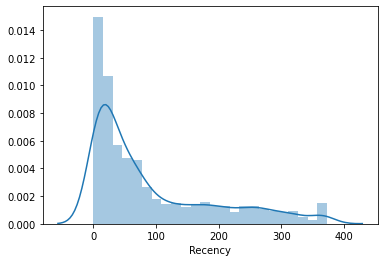

In [37]:
#recency Distribusion plot
sns.distplot(rfm.Recency)

In [38]:
rfm.Frequency.describe()

count    3921.000000
mean       90.371079
std       217.796155
min         1.000000
25%        17.000000
50%        41.000000
75%        99.000000
max      7847.000000
Name: Frequency, dtype: float64

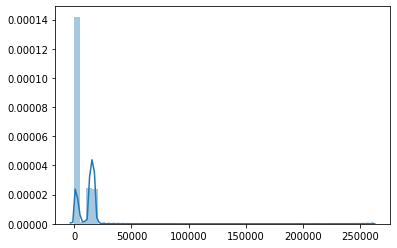

In [39]:
#Frequency Distribusion plot
sns.distplot(rfm[rfm['Frequency']<1000])


In [40]:
rfm.Price.describe()

count      3921.000000
mean       1863.910113
std        7481.922217
min           0.000000
25%         300.040000
50%         651.820000
75%        1575.890000
max      259657.300000
Name: Price, dtype: float64

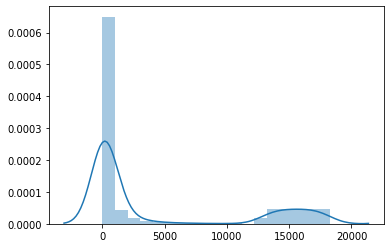

In [41]:
sns.distplot(rfm[rfm['Price']<15000])

In [42]:
#split into customer segment using quantiles
quantiles=rfm.quantile(q=[0.25,0.5,0.75])
quantiles=quantiles.to_dict()

In [43]:
quantiles

{'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 99.0},
 'Price': {0.25: 300.03999999999996,
  0.5: 651.8200000000002,
  0.75: 1575.8900000000003},
 'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0}}

In [44]:
#create R,F,M segments
def rfm_RSeg(x,p,d):
    if x<=d[p][0.25]:
        return 1
    elif x<=d[p][0.5]:
        return 2
    elif x<=d[p][0.75]:
        return 3
    else:
        return 4
    

    

In [45]:
def rfm_FMSeg(x,p,d):
    if x<=d[p][0.25]:
        return 4
    elif x<=d[p][0.5]:
        return 3
    elif x<=d[p][0.75]:
        return 2
    else:
        return 1


In [46]:
rfm['R'] = rfm['Recency'].apply(rfm_RSeg, args=('Recency',quantiles,))
rfm['F'] = rfm['Frequency'].apply(rfm_FMSeg, args=('Frequency',quantiles,))
rfm['M'] = rfm['Price'].apply(rfm_FMSeg, args=('Price',quantiles,))
rfm.head()
    

,CustomerID,Price,Frequency,Recency,R,F,M
0,12346.0,77183.60,1,325,4,4,1
1,12747.0,4196.01,103,1,1,1,1
2,12748.0,33719.73,4596,0,1,1,1
3,12749.0,4090.88,199,3,1,1,1
4,12820.0,942.34,59,2,1,2,2


In [47]:
rfm.R.value_counts()

1    1025
4     976
3     962
2     958
Name: R, dtype: int64

In [48]:
#rfm group value column for concatenate the combined individual score
rfm['rfm_group']=rfm.R.map(str)+rfm.F.map(str)+rfm.M.map(str)

In [49]:
rfm['rfm_score']=rfm['R']+rfm['F']+rfm['M']

In [50]:
rfm.head()

,CustomerID,Price,Frequency,Recency,R,F,M,rfm_group,rfm_score
0,12346.0,77183.60,1,325,4,4,1,441,9
1,12747.0,4196.01,103,1,1,1,1,111,3
2,12748.0,33719.73,4596,0,1,1,1,111,3
3,12749.0,4090.88,199,3,1,1,1,111,3
4,12820.0,942.34,59,2,1,2,2,122,5


In [51]:
#create loyaliy level
loyalty_level=['platinum','Gold','Silver','Bzonze']
score_cuts=pd.qcut(rfm.rfm_score, q= 4, labels=loyalty_level)
rfm['RFM_loyal_level']=score_cuts.values
rfm.reset_index().head()

,index,CustomerID,Price,Frequency,Recency,R,F,M,rfm_group,rfm_score,RFM_loyal_level
0,0,12346.0,77183.60,1,325,4,4,1,441,9,Silver
1,1,12747.0,4196.01,103,1,1,1,1,111,3,platinum
2,2,12748.0,33719.73,4596,0,1,1,1,111,3,platinum
3,3,12749.0,4090.88,199,3,1,1,1,111,3,platinum
4,4,12820.0,942.34,59,2,1,2,2,122,5,platinum


In [52]:
rfm[rfm['rfm_group']=='111'].sort_values('Price',ascending=False).reset_index().head(15)

,index,CustomerID,Price,Frequency,Recency,R,F,M,rfm_group,rfm_score,RFM_loyal_level
0,3784,18102.0,259657.30,431,0,1,1,1,111,3,platinum
1,3315,17450.0,194550.79,337,7,1,1,1,111,3,platinum
2,3357,17511.0,91062.38,963,2,1,1,1,111,3,platinum
3,2767,16684.0,66653.56,277,3,1,1,1,111,3,platinum
4,903,14096.0,65164.79,5111,3,1,1,1,111,3,platinum
5,621,13694.0,65039.62,568,3,1,1,1,111,3,platinum
6,1772,15311.0,60767.90,2379,0,1,1,1,111,3,platinum
7,191,13089.0,58825.83,1818,2,1,1,1,111,3,platinum
8,2110,15769.0,56252.72,130,6,1,1,1,111,3,platinum
9,1580,15061.0,54534.14,403,3,1,1,1,111,3,platinum


In [53]:
graph = rfm.query("Price < 50000 and Frequency < 2000")


In [54]:
def cat_level(x):
    if x=='platinum':
        return 1
    elif x=='Gold':
        return 2
    elif x=='Silver':
        return 3
    else:
        return 4
    
graph['RFM_loyal_level']=graph['RFM_loyal_level'].map(cat_level)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [55]:
import plotly.figure_factory as ff


In [56]:
import plotly.graph_objects as go

In [57]:
x=graph['Price']
y=graph['Frequency']
z=graph['Recency']   
a=graph['RFM_loyal_level']
fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=8,
        color=a,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8,
        showscale=True
         ),
    
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()



In [58]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_data(x):
    if x<=0:
        return 1
    else:
        return x



In [59]:
rfm['Price'] = rfm['Price'].map(handle_data)
rfm['Recency'] = rfm['Recency'].map(handle_data)

In [60]:
#Perform Log transformation to bring data into normal or near normal distribution
rfm_lg = rfm[['Recency', 'Frequency', 'Price']].apply(np.log, axis = 1).round(3)

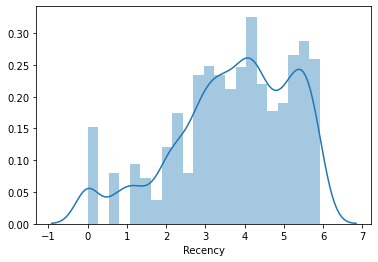

In [61]:
#distribution plot for Recency
sns.distplot(rfm_lg.Recency)

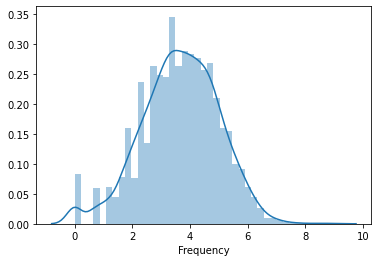

In [62]:
#distribution plot for Frequency
sns.distplot(rfm_lg.Frequency)

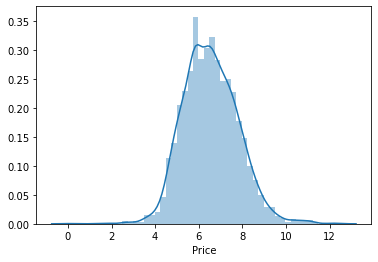

In [63]:
#dist plot for Price
sns.distplot(rfm_lg.Price)

In [64]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
rfm_lg=scaler.fit_transform(rfm_lg)

In [65]:
rfm_lg_data=pd.DataFrame(rfm_lg,index=rfm.index,columns=['Price','Frequency','Recency'])

In [66]:
rfm_lg_data

,Price,Frequency,Recency
0,1.375709,-2.733639,3.766415
1,-2.448913,0.726978,1.439009
2,-2.448913,3.562667,3.104639
3,-1.722209,1.218258,1.419028
4,-1.990673,0.311106,0.244935
...,...,...,...
3916,1.269910,-1.014157,-1.075421
3917,0.984915,-1.280702,-1.718015
3918,-1.162137,-0.878270,-1.086610
3919,-1.722209,2.215005,0.883533


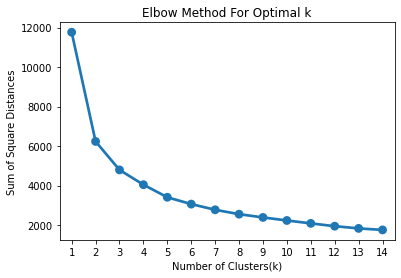

In [67]:
from sklearn.cluster import KMeans
SSD={}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(rfm_lg_data)
    SSD[k] = km.inertia_


#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(SSD.keys()), y = list(SSD.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [68]:
#clustering model
KMean_clust = KMeans(n_clusters= 3, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(rfm_lg_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [69]:
#make data set with cluster
rfm['Cluster']=KMean_clust.labels_
rfm.head()

,CustomerID,Price,Frequency,Recency,R,F,M,rfm_group,rfm_score,RFM_loyal_level,Cluster
0,12346.0,77183.60,1,325,4,4,1,441,9,Silver,1
1,12747.0,4196.01,103,1,1,1,1,111,3,platinum,2
2,12748.0,33719.73,4596,1,1,1,1,111,3,platinum,2
3,12749.0,4090.88,199,3,1,1,1,111,3,platinum,2
4,12820.0,942.34,59,2,1,2,2,122,5,platinum,2


In [70]:
rfm.Cluster.value_counts()

1    1661
0    1439
2     821
Name: Cluster, dtype: int64

In [71]:
x=rfm['Price']
y=rfm['Frequency']
z=rfm['Recency']   
a=rfm['Cluster']
fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=12,
        color=a,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8,
        showscale=True
         ),
    
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()


In [72]:
#apply DBScan clustering
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=3,min_samples=4)
db.fit(rfm_lg_data)

DBSCAN(algorithm='auto', eps=3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=4, n_jobs=None, p=None)

In [73]:
rfm_lg_data

,Price,Frequency,Recency
0,1.375709,-2.733639,3.766415
1,-2.448913,0.726978,1.439009
2,-2.448913,3.562667,3.104639
3,-1.722209,1.218258,1.419028
4,-1.990673,0.311106,0.244935
...,...,...,...
3916,1.269910,-1.014157,-1.075421
3917,0.984915,-1.280702,-1.718015
3918,-1.162137,-0.878270,-1.086610
3919,-1.722209,2.215005,0.883533


In [74]:

rfm['Cluster_DBS'] = db.labels_


In [75]:
rfm.Cluster_DBS.value_counts()

0    3921
Name: Cluster_DBS, dtype: int64

In [76]:
x=rfm['Price']
y=rfm['Frequency']
z=rfm['Recency']   
a=rfm['Cluster_DBS']
fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=10,
        color=a,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8,
        showscale=True
         ),
    
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()


In [77]:
#DBScan returns 1 cluster only,the density in our data is not that strong.Performed better for a bigger data.

In [78]:
#lets try with Hierarchical Clustering.
from sklearn.cluster import AgglomerativeClustering 

agglom = AgglomerativeClustering(n_clusters=3, linkage='average').fit(rfm_lg_data)
rfm['Cluster_Agl'] = agglom.labels_


In [79]:
x=rfm['Price']
y=rfm['Frequency']
z=rfm['Recency']   
a=rfm['Cluster_Agl']
fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=10,
        color=a,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8,
        showscale=True
         ),
    
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()


In [80]:
rfm['Cluster_Agl'].value_counts()

0    3904
2      16
1       1
Name: Cluster_Agl, dtype: int64

In [81]:
#
from sklearn.cluster import MeanShift, estimate_bandwidth
# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(rfm_lg_data, quantile=0.1)
ms = MeanShift(bandwidth).fit(rfm_lg_data)
rfm['Cluster_MnSf'] = ms.labels_

In [82]:
x=rfm['Price']
y=rfm['Frequency']
z=rfm['Recency']   
a=rfm['Cluster_MnSf']
fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=10,
        color=a,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8,
        showscale=True
         ),
    
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()


In [83]:
rfm['Cluster_MnSf'].value_counts()

0     3322
7      290
1      192
4       58
8       22
6       20
2       10
9        3
5        2
3        1
10       1
Name: Cluster_MnSf, dtype: int64

In [84]:
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

dist = distance_matrix(rfm_lg_data, rfm_lg_data)
print(dist)

[[0.         5.65865861 7.39656335 ... 5.78229211 6.51131171 4.56240029]
 [5.65865861 0.         3.28868631 ... 3.25750923 1.74667686 2.57463212]
 [7.39656335 3.28868631 0.         ... 6.2405358  2.69770351 4.61325546]
 ...
 [5.78229211 3.25750923 6.2405358  ... 0.         3.70991888 2.57227941]
 [6.51131171 1.74667686 2.69770351 ... 3.70991888 0.         2.49272482]
 [4.56240029 2.57463212 4.61325546 ... 2.57227941 2.49272482 0.        ]]


In [85]:
Z = hierarchy.linkage(dist, 'complete')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



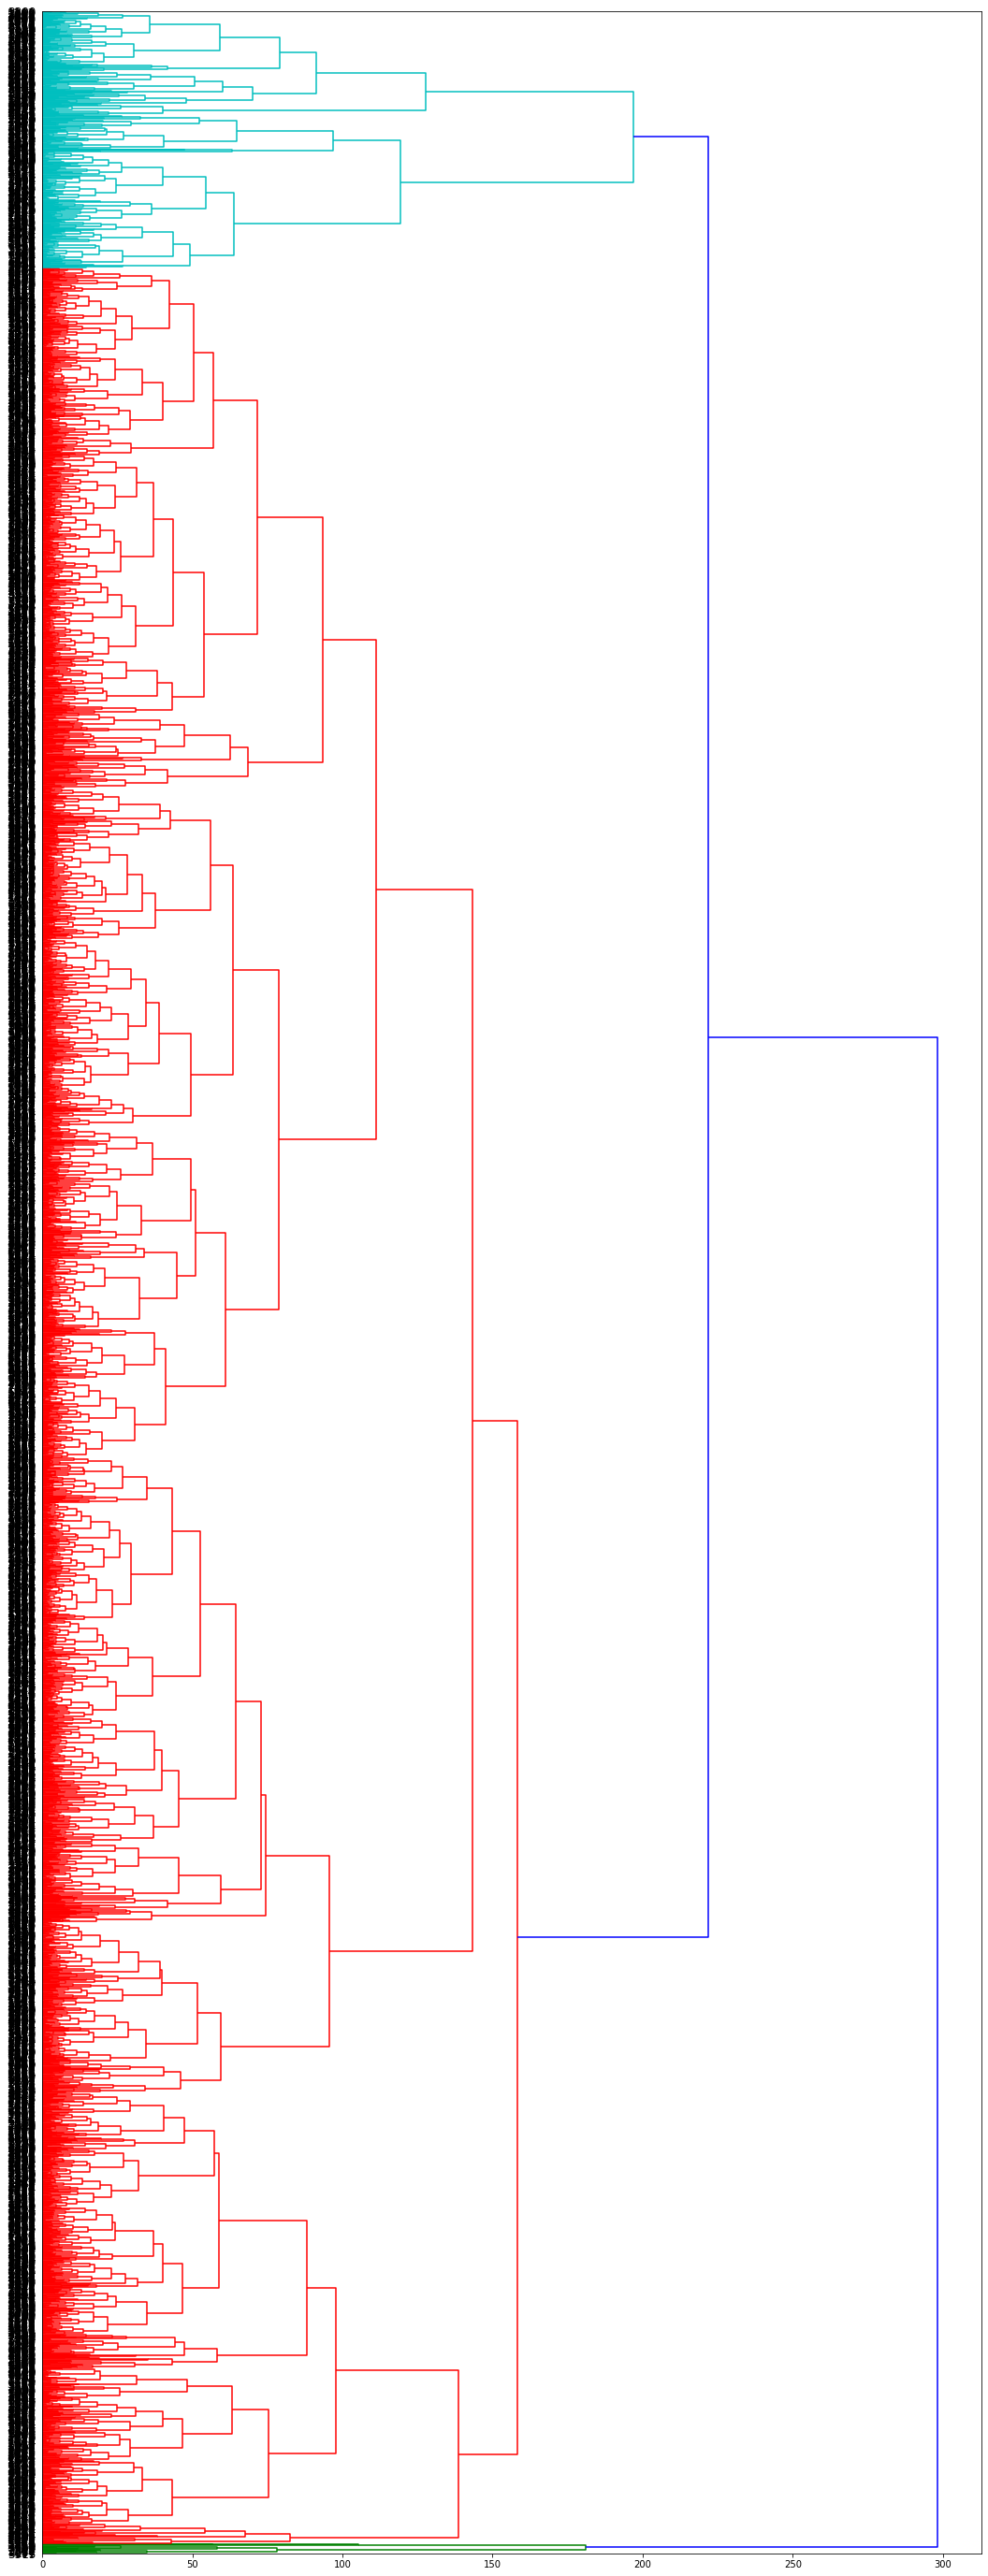

In [86]:
plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation='right')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



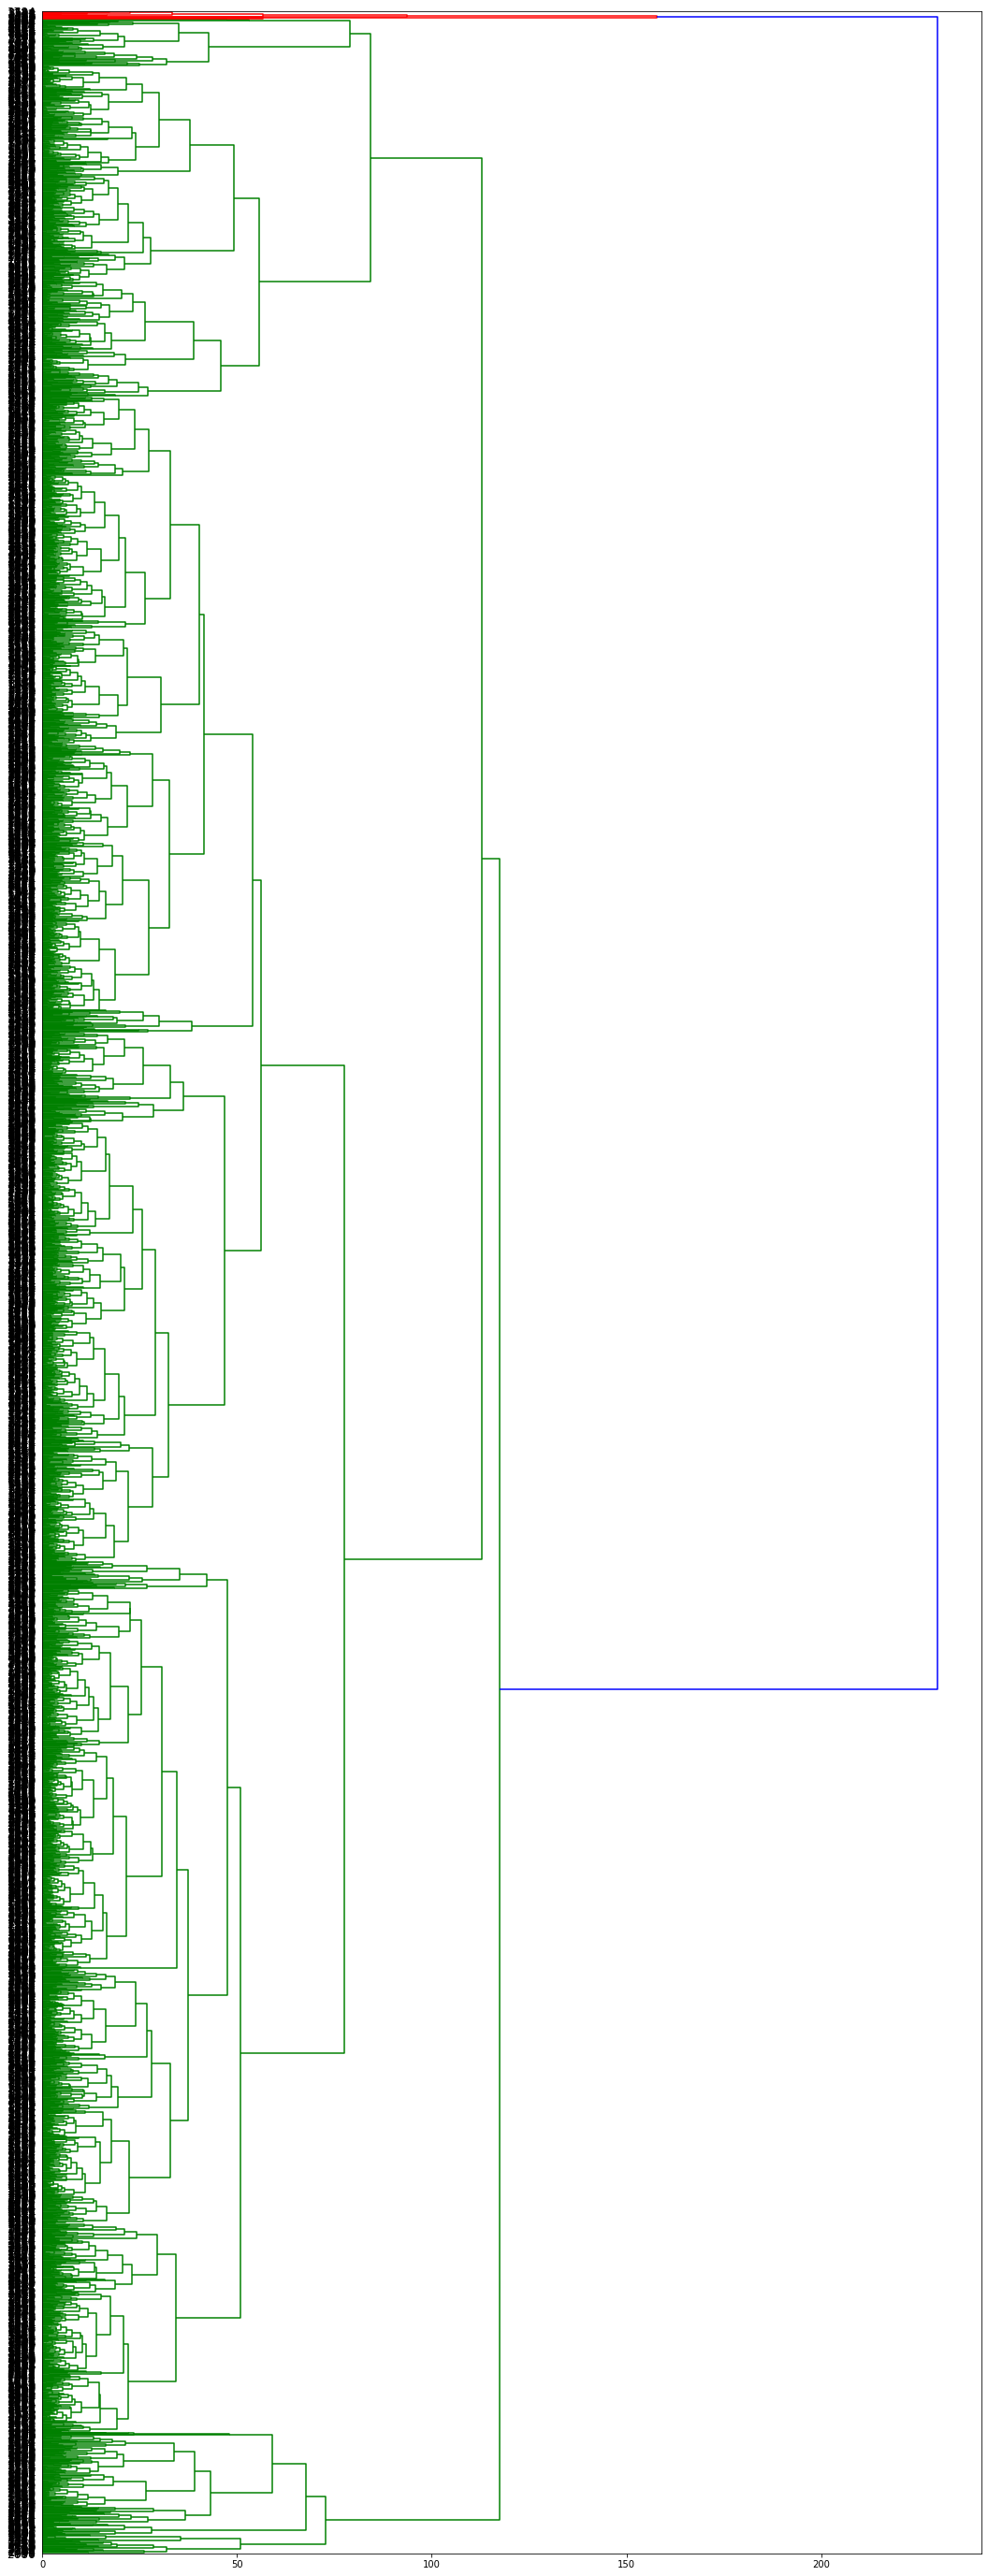

In [87]:
#We used complete linkage for our case, let's change it to average linkage to see how the dendogram changes.
Z1 = hierarchy.linkage(dist, 'average')
plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z1, leaf_rotation=0, leaf_font_size =12, orientation = 'right')